In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *        # Quick access to most common functionality
from fastai.text import *   # Quick access to NLP functionality
from pathlib import Path
from fastai.vision import *

epochs = 20

In [3]:
accuracy_list = []

In [4]:
path_clas = Path('/home/ubuntu/data/autopsy')
path_lm = Path('/home/ubuntu/data/autopsy')

batch_size=32
drop_mult=0.5
learning_rate= 1e-3
wd=1e-4
num_folds = 5

folds = ['data_suicide_homicide_k_1.csv','data_suicide_homicide_k_2.csv','data_suicide_homicide_k_3.csv','data_suicide_homicide_k_4.csv','data_suicide_homicide_k_5.csv']


In [5]:
data_lm = TextLMDataBunch.from_csv(path_lm, 'data_suicide_homicide_k_1.csv', classes=['Suicide','Homicide'])

In [6]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[0], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [7]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


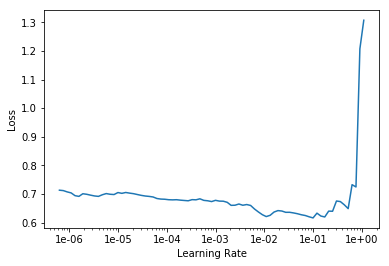

In [8]:
learn.recorder.plot()

In [9]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:10
epoch  train_loss  valid_loss  accuracy
1      0.597001    0.494508    0.799228  (00:02)
2      0.572480    0.463587    0.795367  (00:02)
3      0.534864    0.419352    0.791506  (00:02)
4      0.482468    0.379719    0.837838  (00:02)



In [10]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:34
epoch  train_loss  valid_loss  accuracy
1      0.554777    0.344813    0.880309  (00:04)
2      0.456320    0.311601    0.899614  (00:05)
3      0.488311    0.299259    0.915058  (00:04)
4      0.449763    0.257737    0.895753  (00:04)
5      0.362144    0.227172    0.922780  (00:05)
6      0.373239    0.215558    0.926641  (00:04)
7      0.356618    0.223479    0.930502  (00:05)
8      0.293876    0.171662    0.934363  (00:05)
9      0.335009    0.206920    0.903475  (00:04)
10     0.338565    0.236226    0.903475  (00:04)
11     0.273631    0.198248    0.922780  (00:05)
12     0.295526    0.218022    0.907336  (00:03)
13     0.340187    0.196026    0.922780  (00:04)
14     0.336385    0.223602    0.911197  (00:03)
15     0.335447    0.173984    0.938224  (00:03)
16     0.246451    0.179487    0.915058  (00:04)
17     0.299137    0.187517    0.934363  (00:04)
18     0.232731    0.144556    0.926641  (00:05)
19     0.239152    0.157700    0.926641  (00:04)
20     0.21

In [11]:
learn.validate()

[0.18805043, tensor(0.9344)]

In [12]:
accuracy_list.append(learn.validate()[1].item())

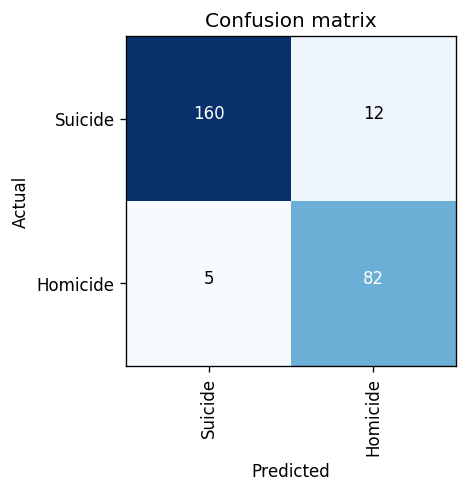

In [13]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

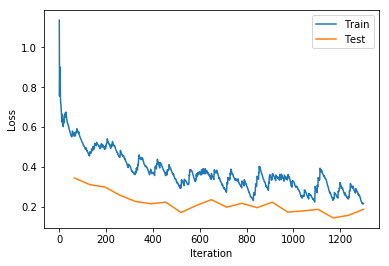

In [14]:
learn.recorder.plot_losses()

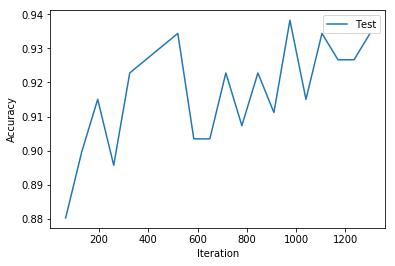

In [15]:
learn.recorder.plot_metrics()

In [16]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[1], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [17]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


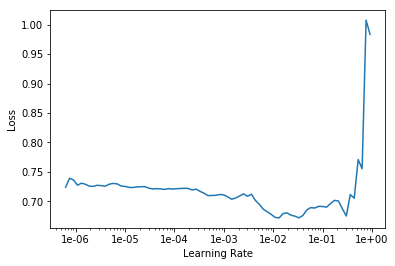

In [18]:
learn.recorder.plot()

In [19]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:10
epoch  train_loss  valid_loss  accuracy
1      0.681607    0.579852    0.725869  (00:02)
2      0.566943    0.434869    0.833977  (00:02)
3      0.566136    0.461003    0.799228  (00:02)
4      0.549588    0.453948    0.764479  (00:02)



In [20]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:34
epoch  train_loss  valid_loss  accuracy
1      0.525597    0.370601    0.864865  (00:05)
2      0.507160    0.369241    0.884170  (00:04)
3      0.448174    0.286301    0.891892  (00:04)
4      0.442985    0.302230    0.903475  (00:04)
5      0.419213    0.247138    0.907336  (00:05)
6      0.426765    0.213730    0.918919  (00:04)
7      0.376947    0.226995    0.918919  (00:04)
8      0.311984    0.197714    0.926641  (00:05)
9      0.365926    0.225803    0.899614  (00:04)
10     0.269716    0.208485    0.922780  (00:04)
11     0.323878    0.236520    0.911197  (00:03)
12     0.272123    0.209382    0.922780  (00:03)
13     0.261026    0.203616    0.926641  (00:04)
14     0.311515    0.228806    0.907336  (00:05)
15     0.365987    0.234287    0.911197  (00:04)
16     0.313493    0.216897    0.903475  (00:04)
17     0.253470    0.185204    0.938224  (00:04)
18     0.279868    0.187784    0.922780  (00:04)
19     0.230445    0.173400    0.949807  (00:05)
20     0.27

In [21]:
learn.validate()

[0.2098732, tensor(0.9189)]

In [22]:
accuracy_list.append(learn.validate()[1].item())

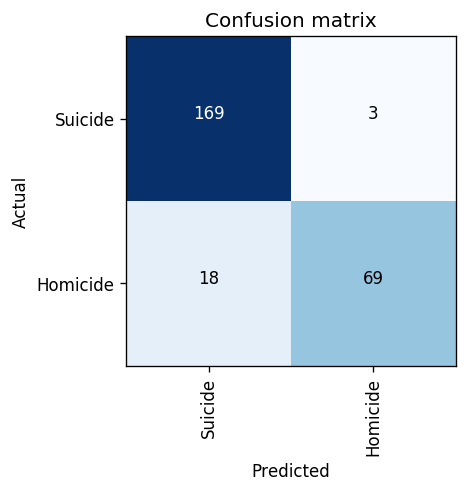

In [23]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

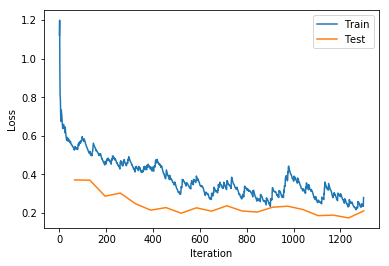

In [24]:
learn.recorder.plot_losses()

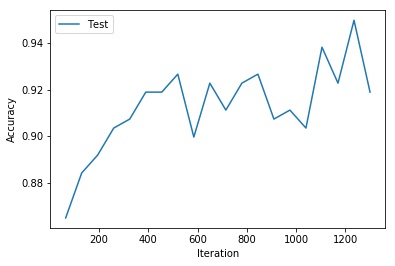

In [25]:
learn.recorder.plot_metrics()

In [26]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[2], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [27]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


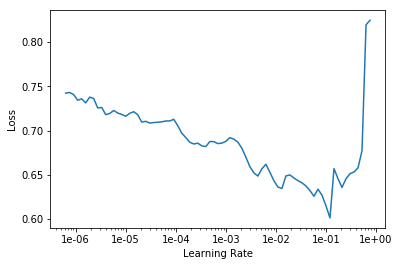

In [28]:
learn.recorder.plot()

In [29]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:10
epoch  train_loss  valid_loss  accuracy
1      0.620491    0.489249    0.814672  (00:02)
2      0.566899    0.521524    0.768340  (00:02)
3      0.572478    0.452644    0.783784  (00:02)
4      0.495101    0.408644    0.791506  (00:02)



In [30]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:41
epoch  train_loss  valid_loss  accuracy
1      0.524105    0.374037    0.884170  (00:05)
2      0.468132    0.278202    0.899614  (00:05)
3      0.431666    0.256566    0.930502  (00:05)
4      0.434430    0.265060    0.899614  (00:04)
5      0.370526    0.238653    0.918919  (00:05)
6      0.347922    0.234126    0.926641  (00:05)
7      0.336594    0.208649    0.922780  (00:04)
8      0.337336    0.198498    0.926641  (00:04)
9      0.307298    0.164956    0.934363  (00:04)
10     0.359739    0.191092    0.930502  (00:04)
11     0.278838    0.192978    0.911197  (00:05)
12     0.311443    0.187692    0.922780  (00:05)
13     0.200751    0.185213    0.930502  (00:06)
14     0.244325    0.191653    0.922780  (00:04)
15     0.223767    0.205042    0.938224  (00:05)
16     0.241476    0.251490    0.899614  (00:05)
17     0.221726    0.188681    0.934363  (00:05)
18     0.260512    0.176705    0.926641  (00:04)
19     0.270564    0.169978    0.930502  (00:04)
20     0.21

In [31]:
learn.validate()

[0.19659898, tensor(0.9266)]

In [32]:
accuracy_list.append(learn.validate()[1].item())

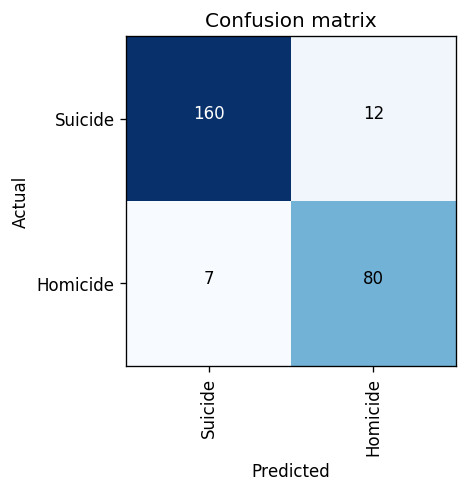

In [33]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

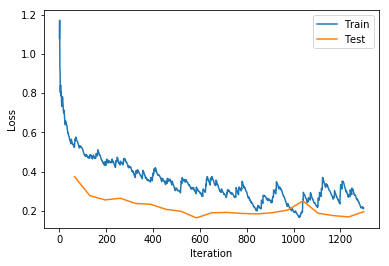

In [34]:
learn.recorder.plot_losses()

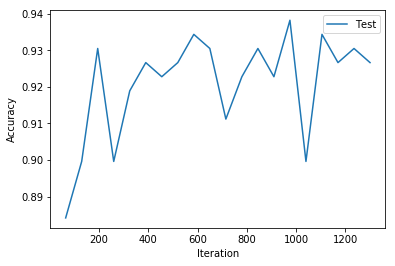

In [35]:
learn.recorder.plot_metrics()

In [36]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[3], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [37]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


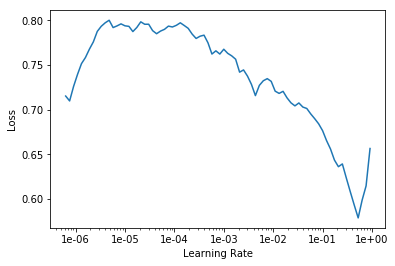

In [38]:
learn.recorder.plot()

In [39]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:10
epoch  train_loss  valid_loss  accuracy
1      0.713346    0.597084    0.694981  (00:02)
2      0.633040    0.448886    0.791506  (00:02)
3      0.560341    0.416565    0.806950  (00:02)
4      0.554113    0.462104    0.779923  (00:02)



In [40]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:39
epoch  train_loss  valid_loss  accuracy
1      0.512493    0.353942    0.903475  (00:05)
2      0.508983    0.292902    0.915058  (00:05)
3      0.520473    0.261436    0.903475  (00:04)
4      0.480907    0.275498    0.911197  (00:04)
5      0.459214    0.267479    0.922780  (00:03)
6      0.410401    0.216447    0.903475  (00:03)
7      0.339477    0.189633    0.945946  (00:04)
8      0.291740    0.200904    0.915058  (00:05)
9      0.292082    0.217133    0.926641  (00:05)
10     0.305596    0.178348    0.930502  (00:04)
11     0.315998    0.195082    0.945946  (00:05)
12     0.290899    0.181438    0.934363  (00:05)
13     0.239243    0.185163    0.922780  (00:06)
14     0.214451    0.180256    0.926641  (00:05)
15     0.212684    0.186313    0.945946  (00:05)
16     0.300837    0.186063    0.911197  (00:04)
17     0.249170    0.211000    0.926641  (00:05)
18     0.277784    0.223866    0.926641  (00:05)
19     0.238012    0.185630    0.930502  (00:04)
20     0.24

In [41]:
learn.validate()

[0.16091755, tensor(0.9266)]

In [42]:
accuracy_list.append(learn.validate()[1].item())

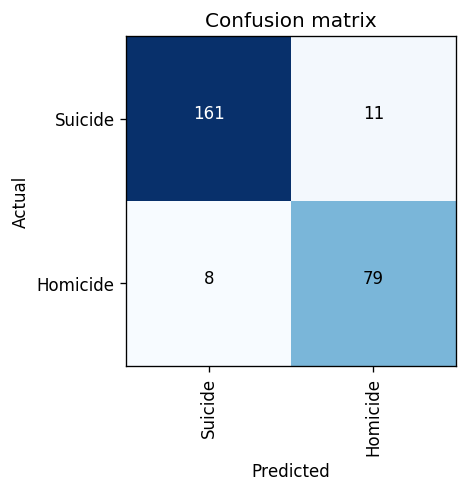

In [43]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

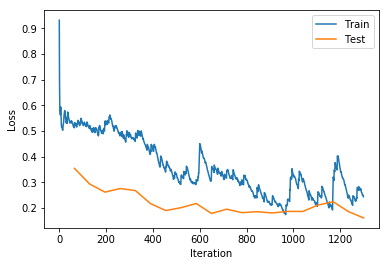

In [44]:
learn.recorder.plot_losses()

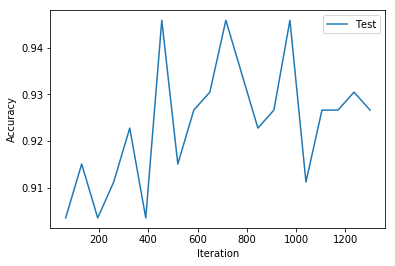

In [45]:
learn.recorder.plot_metrics()

In [46]:
data_clas = TextClasDataBunch.from_csv(path_clas,folds[4], vocab=data_lm.train_ds.vocab, classes=['Suicide','Homicide'], bs=batch_size)

learn = text_classifier_learner(data_clas, drop_mult=drop_mult, emb_sz=300, nh=198, nl=1)
learn.load_encoder('enc_autopsy_not_pretrained_simple')

learn.freeze()



In [47]:
learn.lr_find()

LR Finder complete, type {learner_name}.recorder.plot() to see the graph.


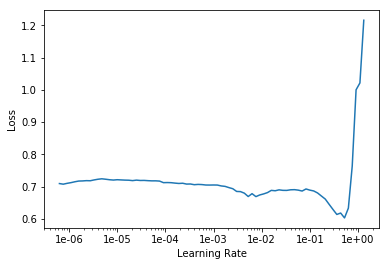

In [48]:
learn.recorder.plot()

In [49]:
learn.fit(4,learning_rate, wd=wd)

Total time: 00:11
epoch  train_loss  valid_loss  accuracy
1      0.630382    0.523101    0.783784  (00:02)
2      0.598285    0.491143    0.779923  (00:02)
3      0.538026    0.439089    0.791506  (00:02)
4      0.509304    0.416807    0.806950  (00:02)



In [50]:
learn.unfreeze()
learn.fit(epochs,learning_rate, wd=wd)

Total time: 01:03
epoch  train_loss  valid_loss  accuracy
1      0.556527    0.414471    0.853282  (00:05)
2      0.507554    0.314179    0.918919  (00:04)
3      0.463292    0.249758    0.903475  (00:03)
4      0.390957    0.258377    0.899614  (00:03)
5      0.383447    0.237646    0.903475  (00:03)
6      0.370276    0.200606    0.922780  (00:03)
7      0.344868    0.204590    0.922780  (00:03)
8      0.366686    0.240086    0.907336  (00:03)
9      0.330493    0.225558    0.903475  (00:03)
10     0.316537    0.185950    0.922780  (00:03)
11     0.310850    0.200406    0.915058  (00:02)
12     0.272059    0.226104    0.926641  (00:02)
13     0.284213    0.187698    0.915058  (00:02)
14     0.254907    0.232381    0.922780  (00:02)
15     0.207623    0.200224    0.930502  (00:02)
16     0.299666    0.240362    0.918919  (00:02)
17     0.174766    0.203677    0.926641  (00:02)
18     0.263483    0.190694    0.934363  (00:02)
19     0.217171    0.200647    0.915058  (00:02)
20     0.22

In [51]:
learn.validate()

[0.18299386, tensor(0.9305)]

In [52]:
accuracy_list.append(learn.validate()[1].item())

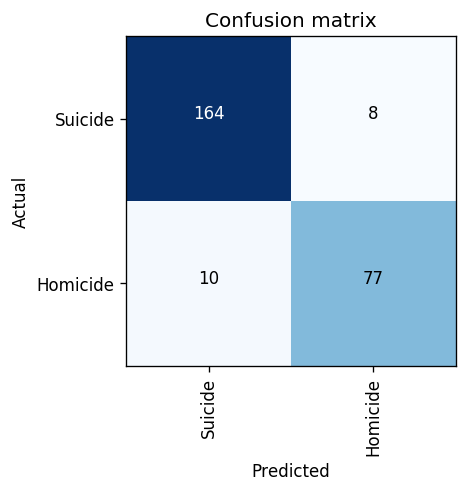

In [53]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix(figsize=(4,4), dpi=120)

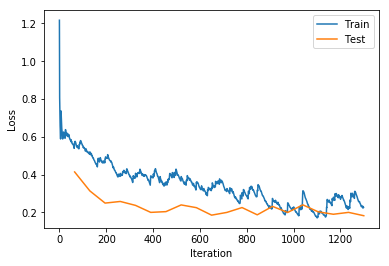

In [54]:
learn.recorder.plot_losses()

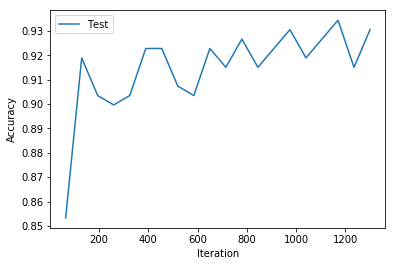

In [55]:
learn.recorder.plot_metrics()

In [56]:
print(accuracy_list)

[0.9343629479408264, 0.9189189076423645, 0.9266409277915955, 0.9266409277915955, 0.9305019378662109]


In [57]:
print(sum(accuracy_list)/len(accuracy_list))

0.9274131298065186


In [59]:
import torch

torch.cuda.empty_cache()